# Environment Configuration

In [ ]:
!pip install torch
!pip install torchvision
!pip install plotly
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 800.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 581.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 658.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 1.7 MB/s eta 0:00:00


In [ ]:
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR, ExponentialLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np
# Data Visualization
import plotly.express as px
# from tqdm.auto import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
# Experimental
from torchvision import models

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Data and model will be loaded on the {device}')

Data and model will be loaded on the cpu


# Colon Dataset

In [ ]:
s_1 = 0.2
colon_dataset =  datasets.ImageFolder(
    '/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon',
    transform = transforms.Compose([
        # Downscale the image by s_1
        transforms.Resize(int(s_1 * 500)),
        transforms.ColorJitter(),
        transforms.ToTensor()
    ])
    )

In [ ]:
loaders = {
    'train' : DataLoader(
    colon_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=1
    )
}

In [ ]:
print(colon_dataset.imgs)
data, target = colon_dataset[0]
print(f'Label: {target}')
px.imshow(np.transpose(data, (1, 2, 0)))

[('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img1.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img100.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img11.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img12.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img15.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img16.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img2.bmp', 0), ('/content/drive/MyDrive/Graduate/Courses/Winter 2024/EECS 6322/Course Project/CustomData/Colon/Negative/img23.bmp', 0), ('/content/drive/MyDrive/Graduat

# $a(\theta)$: Attention Map for Down-scaled Input Image

In [ ]:
"""
This is the implementation of a(\theta) defined by the paper appendix with some modifications due to
a lack of details...
"""
class step_1_attention_lenet(nn.Module):
  def __init__(self):
    # Superconstructor to inherit nn.Module Properties
    super(step_1_attention_lenet, self).__init__()
    # Layers
    self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
    self.conv2 = nn.Conv2d(8, 8, 3, 1, 1)
    self.conv3 = nn.Conv2d(8, 1, 3, 1, 1)
    self.average_pooling = nn.AvgPool2d(1)
  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.tanh(self.conv2(x))
    x = F.tanh(self.conv3(x))
    x = self.average_pooling(x)
    x = F.softmax(x, dim = 2)
    return x

# $b(\theta)$: Attention Map for Attention Map

In [ ]:
"""
This is the implementation of b(\theta) defined by the paper appendix with some modifications due to
a lack of details...
"""
class step_2_attention_lenet(nn.Module):
  def __init__(self):
    # Superconstructor to inherit nn.Module Properties
    super(step_2_attention_lenet, self).__init__()
    self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
    self.conv2 = nn.Conv2d(8, 8, 3, 1, 1)
    self.conv3 = nn.Conv2d(8, 1, 3, 1, 1)
  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.tanh(self.conv2(x))
    x = F.softmax(self.conv3(x), dim = 2)
    return x

## $f(\theta):$ Feature Extractor

In [ ]:
class step_2_feature_extraction(nn.Module):
  def __init__(self):
    # Superconstructor to inherit nn.Module Properties
    super(step_2_feature_extraction, self).__init__()
    self.conv1 = nn.Conv2d(32, 32, 7, 1, 3)
    self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
    self.conv3 = nn.Conv2d(32, 32, 3, 1, 1)
    self.average_pooling = nn.AvgPool2d(1)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = self.average_pooling(x)
    return x

## Classification Module $g(\theta)$

In [ ]:
class step_2_classification(nn.Module):
  def __init__(self):
    # Superconstructor to inherit nn.Modules
    super(step_2_classification, self).__init__()
    self.fc = nn.Linear(32, 2)
  def forward(self, x):
    return self.fc(x)

# Zoom-In Network

In [ ]:
class AttentionNetwork(nn.Module):
    def __init__(self):
        super(AttentionNetwork, self).__init__()
        # Input has images of dimension (100 x 100)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 100, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(100 * 25 * 25, 512)
        self.fc2 = nn.Linear(512, 2)
        self.batch_norm_1 = nn.BatchNorm2d(32)
        self.batch_norm_2 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p=0.5)


        # Attention Network applied after the first convolutional layer
        self.attention = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=1),
            nn.Softmax(dim=-1)
        )


    def forward(self, x):

        x = torch.relu(self.conv1(x))
        x = self.batch_norm_1(x)
        x = self.dropout(x)
        """
        Goal: Apply attention after first convolution to get spatial features
          i) Calculate the attention weights
        """
        # Calculate attention weights
        attention_weights = self.attention(x)
        # Normalize attention weights to sum up to 1
        attention_weights = F.normalize(attention_weights, p=1, dim=(2, 3))
        # Incorporate attention into the forward pass
        x = x * attention_weights
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = self.batch_norm_2(x)
        x = self.dropout(x)
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv3(x))

        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x, attention_weights

In [ ]:
# Initialize your model
model = AttentionNetwork()
# Book Keeping
training_loss = []
training_accuracy = []
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    betas = (0.9, 0.999),
    lr = 0.001,
    weight_decay=1e-5
    )
# scheduler = ExponentialLR(optimizer, gamma=0.9)

# Training loop
epochs = 100
model.train()

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    print(f'Epoch: {epoch}')
    for image, label in tqdm(loaders['train']):
        image, label = image.to(device), label.to(device)
        optimizer.zero_grad()
        output, attention_weights = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        correct += (predicted == label).sum().item()
    # scheduler.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {round(loss.item(), 2)}")
    print(f"Accuracy:\n\tCorrect: {correct}\n\tSamples: {100}\n\tScore: {round((correct / 100), 2) * 100}")
    # Book Keeping
    training_loss.append(loss.item())
    training_accuracy.append(round(correct / 100, 2) * 100)


Epoch: 0


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Epoch 1/100, Loss: 0.58
Accuracy:
	Correct: 47
	Samples: 100
	Score: 47.0
Epoch: 1


100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


Epoch 2/100, Loss: 0.69
Accuracy:
	Correct: 48
	Samples: 100
	Score: 48.0
Epoch: 2


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 3/100, Loss: 0.69
Accuracy:
	Correct: 58
	Samples: 100
	Score: 57.99999999999999
Epoch: 3


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Epoch 4/100, Loss: 0.83
Accuracy:
	Correct: 59
	Samples: 100
	Score: 59.0
Epoch: 4


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 5/100, Loss: 0.86
Accuracy:
	Correct: 57
	Samples: 100
	Score: 56.99999999999999
Epoch: 5


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Epoch 6/100, Loss: 0.77
Accuracy:
	Correct: 66
	Samples: 100
	Score: 66.0
Epoch: 6


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 7/100, Loss: 0.41
Accuracy:
	Correct: 70
	Samples: 100
	Score: 70.0
Epoch: 7


100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


Epoch 8/100, Loss: 0.51
Accuracy:
	Correct: 71
	Samples: 100
	Score: 71.0
Epoch: 8


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 9/100, Loss: 0.45
Accuracy:
	Correct: 80
	Samples: 100
	Score: 80.0
Epoch: 9


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Epoch 10/100, Loss: 0.79
Accuracy:
	Correct: 71
	Samples: 100
	Score: 71.0
Epoch: 10


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Epoch 11/100, Loss: 0.29
Accuracy:
	Correct: 79
	Samples: 100
	Score: 79.0
Epoch: 11


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 12/100, Loss: 0.41
Accuracy:
	Correct: 84
	Samples: 100
	Score: 84.0
Epoch: 12


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Epoch 13/100, Loss: 0.07
Accuracy:
	Correct: 84
	Samples: 100
	Score: 84.0
Epoch: 13


100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


Epoch 14/100, Loss: 0.04
Accuracy:
	Correct: 90
	Samples: 100
	Score: 90.0
Epoch: 14


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 15/100, Loss: 0.08
Accuracy:
	Correct: 95
	Samples: 100
	Score: 95.0
Epoch: 15


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 16/100, Loss: 0.01
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 16


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 17/100, Loss: 0.18
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 17


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Epoch 18/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 18


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 19/100, Loss: 0.05
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 19


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 20/100, Loss: 0.02
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 20


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 21/100, Loss: 0.04
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 21


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 22/100, Loss: 0.02
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 22


100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


Epoch 23/100, Loss: 0.42
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 23


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 24/100, Loss: 0.12
Accuracy:
	Correct: 94
	Samples: 100
	Score: 94.0
Epoch: 24


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 25/100, Loss: 0.24
Accuracy:
	Correct: 93
	Samples: 100
	Score: 93.0
Epoch: 25


100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


Epoch 26/100, Loss: 0.17
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 26


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 27/100, Loss: 0.03
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 27


100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


Epoch 28/100, Loss: 0.01
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 28


100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


Epoch 29/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 29


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 30/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 30


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 31/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 31


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 32/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 32


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 33/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 33


100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


Epoch 34/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 34


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 35/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 35


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 36/100, Loss: 0.0
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 36


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 37/100, Loss: 0.09
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 37


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 38/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 38


100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


Epoch 39/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 39


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 40/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 40


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 41/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 41


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 42/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 42


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 43/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 43


100%|██████████| 20/20 [00:16<00:00,  1.21it/s]


Epoch 44/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 44


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Epoch 45/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 45


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 46/100, Loss: 0.0
Accuracy:
	Correct: 96
	Samples: 100
	Score: 96.0
Epoch: 46


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 47/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 47


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 48/100, Loss: 0.05
Accuracy:
	Correct: 90
	Samples: 100
	Score: 90.0
Epoch: 48


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Epoch 49/100, Loss: 0.0
Accuracy:
	Correct: 96
	Samples: 100
	Score: 96.0
Epoch: 49


100%|██████████| 20/20 [00:16<00:00,  1.18it/s]


Epoch 50/100, Loss: 0.07
Accuracy:
	Correct: 94
	Samples: 100
	Score: 94.0
Epoch: 50


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 51/100, Loss: 0.01
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 51


100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


Epoch 52/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 52


100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


Epoch 53/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 53


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Epoch 54/100, Loss: 0.01
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 54


100%|██████████| 20/20 [00:18<00:00,  1.11it/s]


Epoch 55/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 55


100%|██████████| 20/20 [00:18<00:00,  1.07it/s]


Epoch 56/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 56


100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


Epoch 57/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 57


100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


Epoch 58/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 58


100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


Epoch 59/100, Loss: 0.01
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 59


100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


Epoch 60/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 60


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


Epoch 61/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 61


100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


Epoch 62/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 62


100%|██████████| 20/20 [00:27<00:00,  1.40s/it]


Epoch 63/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 63


100%|██████████| 20/20 [00:28<00:00,  1.45s/it]


Epoch 64/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 64


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


Epoch 65/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 65


100%|██████████| 20/20 [00:30<00:00,  1.51s/it]


Epoch 66/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 66


100%|██████████| 20/20 [00:30<00:00,  1.54s/it]


Epoch 67/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 67


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


Epoch 68/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 68


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Epoch 69/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 69


100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


Epoch 70/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 70


100%|██████████| 20/20 [00:31<00:00,  1.57s/it]


Epoch 71/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 71


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Epoch 72/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 72


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


Epoch 73/100, Loss: 0.0
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 73


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


Epoch 74/100, Loss: 0.01
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 74


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Epoch 75/100, Loss: 0.17
Accuracy:
	Correct: 98
	Samples: 100
	Score: 98.0
Epoch: 75


100%|██████████| 20/20 [00:30<00:00,  1.51s/it]


Epoch 76/100, Loss: 0.0
Accuracy:
	Correct: 96
	Samples: 100
	Score: 96.0
Epoch: 76


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


Epoch 77/100, Loss: 0.0
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 77


100%|██████████| 20/20 [00:30<00:00,  1.54s/it]


Epoch 78/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 78


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


Epoch 79/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 79


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 80/100, Loss: 0.16
Accuracy:
	Correct: 97
	Samples: 100
	Score: 97.0
Epoch: 80


100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


Epoch 81/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 81


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 82/100, Loss: 0.02
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 82


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 83/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 83


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 84/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 84


100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


Epoch 85/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 85


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 86/100, Loss: 0.05
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 86


100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


Epoch 87/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 87


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 88/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 88


100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


Epoch 89/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 89


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 90/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 90


100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


Epoch 91/100, Loss: 0.0
Accuracy:
	Correct: 99
	Samples: 100
	Score: 99.0
Epoch: 91


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 92/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 92


100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


Epoch 93/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 93


100%|██████████| 20/20 [00:33<00:00,  1.66s/it]


Epoch 94/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 94


100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


Epoch 95/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 95


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 96/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 96


100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


Epoch 97/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 97


100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


Epoch 98/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 98


100%|██████████| 20/20 [00:34<00:00,  1.72s/it]


Epoch 99/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0
Epoch: 99


100%|██████████| 20/20 [00:33<00:00,  1.70s/it]

Epoch 100/100, Loss: 0.0
Accuracy:
	Correct: 100
	Samples: 100
	Score: 100.0


In [ ]:
fig1 = px.line(
     x = [x for x in range(len(training_loss))],
    y = training_loss,
    labels = {
        'x': 'Step',
        'y': 'Loss',
    },
    title = 'Loss Curve for Training Network'
)
fig1.show()

fig2 = px.line(
    x = [x for x in range(len(training_accuracy))],
    y = training_accuracy,
    labels = {
        'x': 'Epoch',
        'y': 'Accuracy (%)',
    },
    title = 'Accuracy Curve for Training Network'
)
fig2.show()

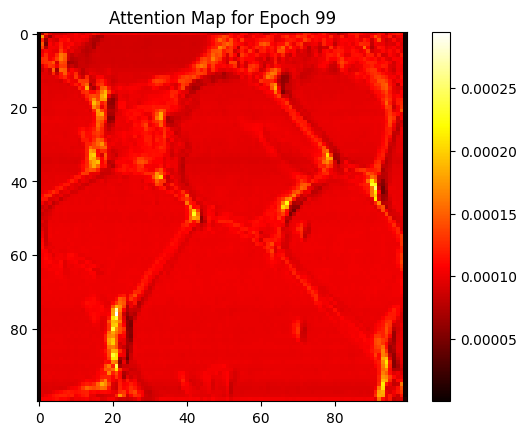

Shape of Attention Map: torch.Size([1, 1, 100, 100])
Attention Map:
tensor([[[[6.3422e-07, 7.2240e-05, 1.2591e-04,  ..., 1.1916e-04,
           1.1403e-04, 7.2793e-06],
          [1.0082e-06, 1.7586e-04, 8.8982e-05,  ..., 1.0105e-04,
           1.0426e-04, 2.9008e-06],
          [1.0985e-06, 1.2459e-04, 6.2711e-05,  ..., 9.3161e-05,
           9.6152e-05, 3.3542e-06],
          ...,
          [2.0227e-06, 9.4193e-05, 9.2788e-05,  ..., 1.1591e-04,
           1.3015e-04, 2.8767e-06],
          [1.9608e-06, 9.5376e-05, 1.0133e-04,  ..., 8.4397e-05,
           1.1604e-04, 2.6152e-06],
          [3.9646e-07, 1.0591e-04, 1.0677e-04,  ..., 8.6297e-05,
           9.2508e-05, 1.0010e-05]]]])


In [ ]:
model.eval()
with torch.no_grad():
  data, target = colon_dataset[0]
  data = data.unsqueeze(0)
  data = data.to(device)
  output, attention_map = model(data)
  # Convert the attention map to a numpy array
  attention_map_numpy = attention_map.squeeze().cpu().numpy()
  # Plot the attention map
  plt.imshow(attention_map_numpy, cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.title(f'Attention Map for Epoch {epoch}')
  plt.savefig(f'attention_map_epoch_{epoch + 1}.png')
  plt.show()
  print(f'Shape of Attention Map: {attention_map.shape}')
  print(f'Attention Map:\n{attention_map}')